**Fourier program B**

This program takes data contained within either a csv or wav file and computes and plots the Fourier transform. Computing the Fourier transform of experimental data is very important as it allows any periodic variations to be identified, giving both their frequency and amplitude. You can use this program to analyse experimental data or recorded sound data. 

Use the separate program ‘Multiple sine wave construction’ to create data consisting of the sums of multiple sine waves, for each sine wave you can specify its frequency and amplitude. Use ~5 sine waves with frequencies in the range 1~ 10kHz. Analyse the created data with Fourier program B. f\(t\) has a very complex form so directly identifying the different frequencies is extremely difficult. However, taking the Fourier transform clearly identifies the frequencies and amplitudes of components present. A few points to note:

●	When the Fourier transform is computed the amplitude of a wave with frequency f is split equally between components at ±f. When plotting the Fourier transform only positive frequencies are shown, so the amplitude of the components is always half the true values.

●	The Fourier transform gives the absolute values of the amplitudes so any negative values are converted to positive values; try making one of the amplitudes negative in the ‘Multiple sine wave construction’ program and investigate if this changes the form of the Fourier transform. It is possible, though more difficult, to obtain the sign of the amplitudes but for most applications the sign is not important. 

Try reducing the sampling rate to a value below that of twice the frequency of one or more of the components. You should observe that now not all components are visible in the Fourier transform. This is because when computing a numerical Fourier transform it is only possible to identify frequencies up to half the sampling rate. Hence, when acquiring data it is important to use a sampling rate of at least twice the maximum frequency you wish to study. This can be understood from the requirement to have at least two data points per period of the wave \(one on each of the positive and negative parts\) to determine its frequency.

Try reducing the time duration of the data and investigate how this affects the form of the Fourier transform. If you have data with two very closely spaced frequency components why might a very short time duration make analysis difficult?

Try one or more of the following:

**Analysis of music** 

There are files containing short recordings of simple music played on different instruments. These can be analysed by the program to reveal the frequency components present. Available files are

Piano middle C – fundamental frequency

Piano C chord – notes C, E and G with fundamental frequencies 

Trumpet1 – single note played on a trumpet

**Amplitude modulation**

When transmitting information by radio the low frequency data, e.g. sound, is superimposed on a much higher frequency known as the carrier. The simplest technique is to use the data signal to vary or modulate the amplitude of the carrier, this is known as amplitude modulation, am. Different data streams, e.g. different radio stations, can use different carrier frequencies. For example, the standard medium wave am radio band uses carrier frequencies over the range 531 to 1602 kHz in steps of 9 kHz. Mathematically if the carrier has frequency f<span style='font-size:x-small'>c</span> and a signal of frequency f<span style='font-size:x-small'>s</span> is to be transmitted then the modulate wave has the form

where A \(0 ≤ A ≤ 1\) is the depth of modulation. 

The program ‘Create Amplitude modulation data’ allows you to create a signal consisting of one or two different carrier frequencies each modulated by a different signal frequency and different depth of modulation. Run this program and initially set fc2=0 so there is only one carrier frequency present. Set f<span style='font-size:x-small'>c1</span>=10000 and f<span style='font-size:x-small'>s1</span>=500 with A<span style='font-size:x-small'>1</span>=0.5. What frequencies are present in the output signal f\(t\)? Can you explain this from the equation for f\(t\) given above? Investigate varying the values of f<span style='font-size:x-small'>s1</span>and A<span style='font-size:x-small'>1</span>, how do these values affect the form of the Fourier transform.

Add a second modulated carrier by setting f<span style='font-size:x-small'>c2</span>=6000, f<span style='font-size:x-small'>s2</span>=250 and an appropriate value for A<span style='font-size:x-small'>2</span>. Investigate the form of the Fourier transform and how it depends on the different parameters. 

A radio can detect a particular data stream \(station\) by filtering out all frequencies except for those in narrow bands either side of the carrier frequency. Using the three remaining frequency components it is possible to reconstruct the original data signal. If the maximum signal frequency is f<span style='font-size:x-small'>s\_max</span> what is the minimum separation of two adjacent carrier frequencies? Try values of f<span style='font-size:x-small'>c1</span>=8000, f<span style='font-size:x-small'>c2</span>=7800, f<span style='font-size:x-small'>s1</span>=250, f<span style='font-size:x-small'>s2</span>=300, A<span style='font-size:x-small'>1</span>=0.8 and A<span style='font-size:x-small'>2</span>=0.4, would it be possible for a radio to detect each of these signals? Given the frequency separation of medium wave am radio stations is 9kHz what is the maximum signal frequency that can be transmitted?

**Different periodic waveforms**

A range of different periodic waveforms as produced by a signal generator have been recorded. Available files are

●	sine\_wave.csv

●	square\_wave.csv \(a somewhat distorted square wave\)

●	triangular\_wave.csv

●	sawtooth\_wave.csv

Study the Fourier transform of each waveform and note which harmonics are present and their relative intensities. Do these agree with examples considered in the lectures?

**Heart beat** 

Data file ECG\_1.csv contains ecg data for a human heart. What frequencies are present, which one corresponds to the heart rate?



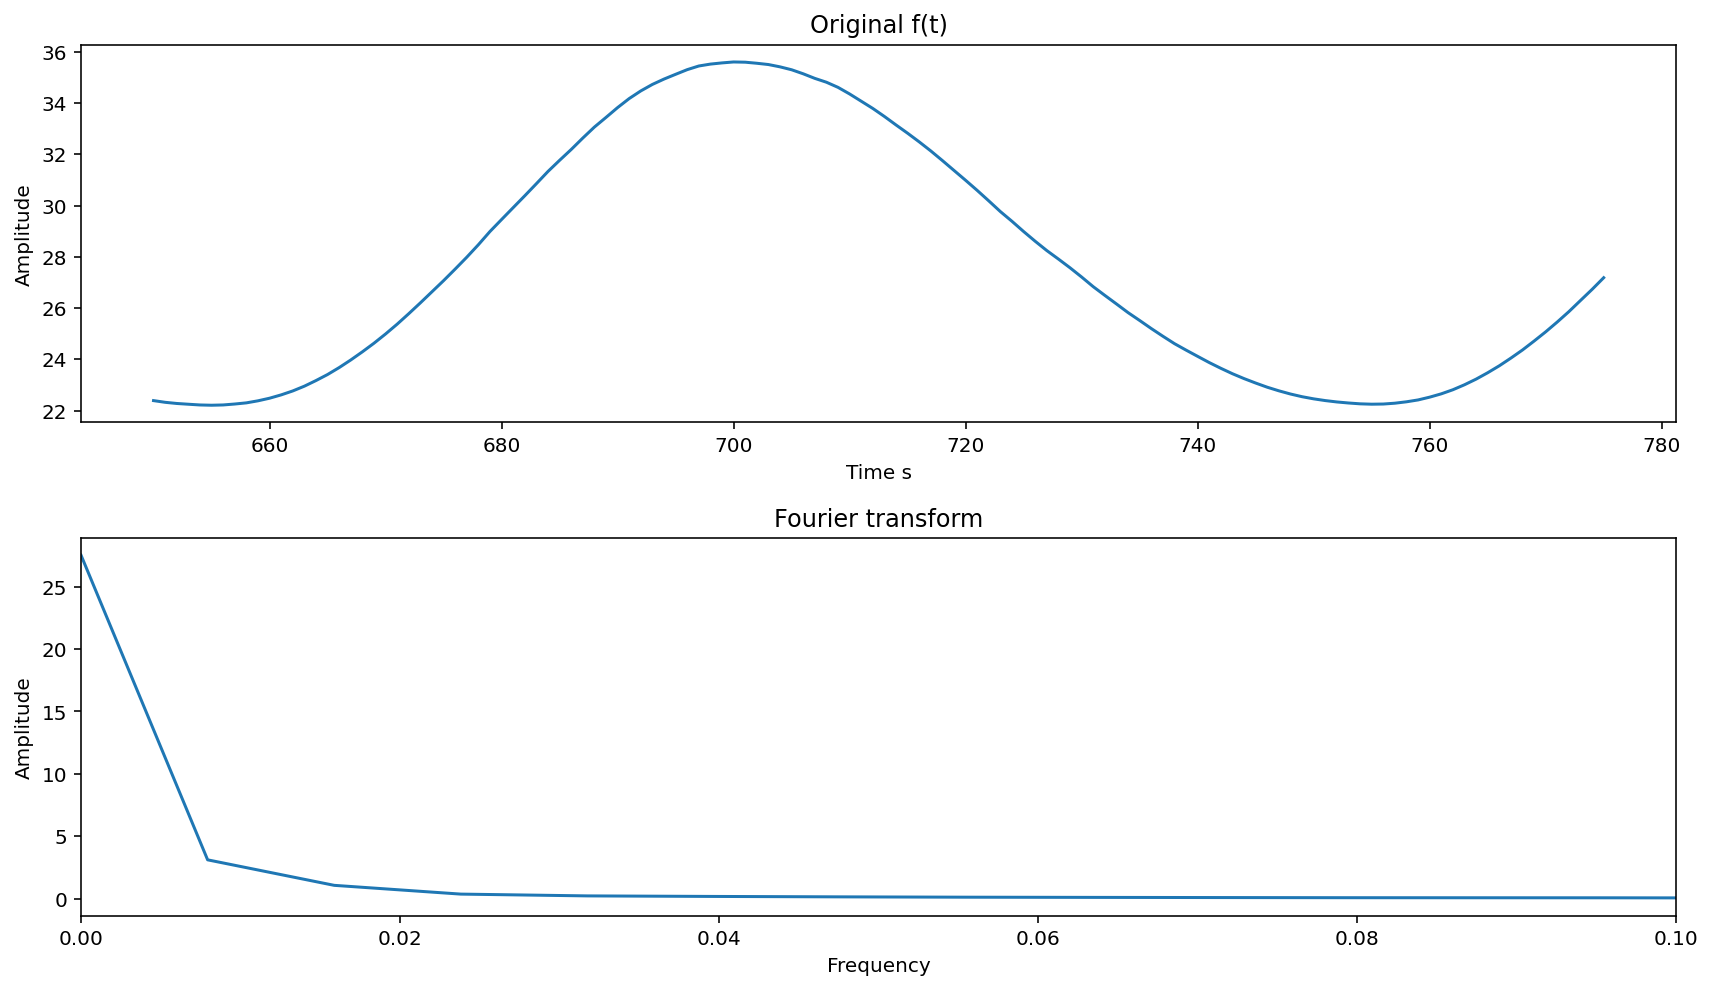

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import csv


Upper_frequency = 0.1 # set upper frequency for plot of Fourier transform, adjust to show Fourier components clearly
Start_time = 0
Time_duration = 0.005 # time duration for plotting f(t), adjust to get a clear plot

data = np.loadtxt('testing2.csv', delimiter=',', skiprows=1) # Read in f(t) from file
# separates data into two arrays, time and amplitudes
time = data[:,0]
amplitude = data[:,1]
samplingFrequency = 1/(time[1]-time[0]) # sampling frequency found from time difference bewteen successive points

# Plot a sample of the input data f(t)
plt.subplot(211)
plt.title('Original f(t)')
#plt.xlim([Start_time,Start_time+Time_duration])
plt.plot(time, amplitude)
plt.xlabel('Time s')
plt.ylabel('Amplitude')


# Calculate the Fourier transform of f(t)
fourierTransform = np.fft.fft(amplitude)/len(amplitude) # Calculate and normalise the Forier transform
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Transform has both positive and negative frequencies, select the positive frequencies
tpCount     = len(amplitude) # At this point the frequency separation of the data in the Fourier transform is unknown, find the frequency values from length of original data and sampling frequency
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod # this array holds the frequency values

# Plot the Fourier transform
plt.subplot(212)
plt.title('Fourier transform')
plt.xlim([0,Upper_frequency])
#plt.ylim([0,0.01]) # may need to include to see Fourier compoents clearly
plt.plot(frequencies, abs(fourierTransform)) # data points are complex so take the absolute values
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

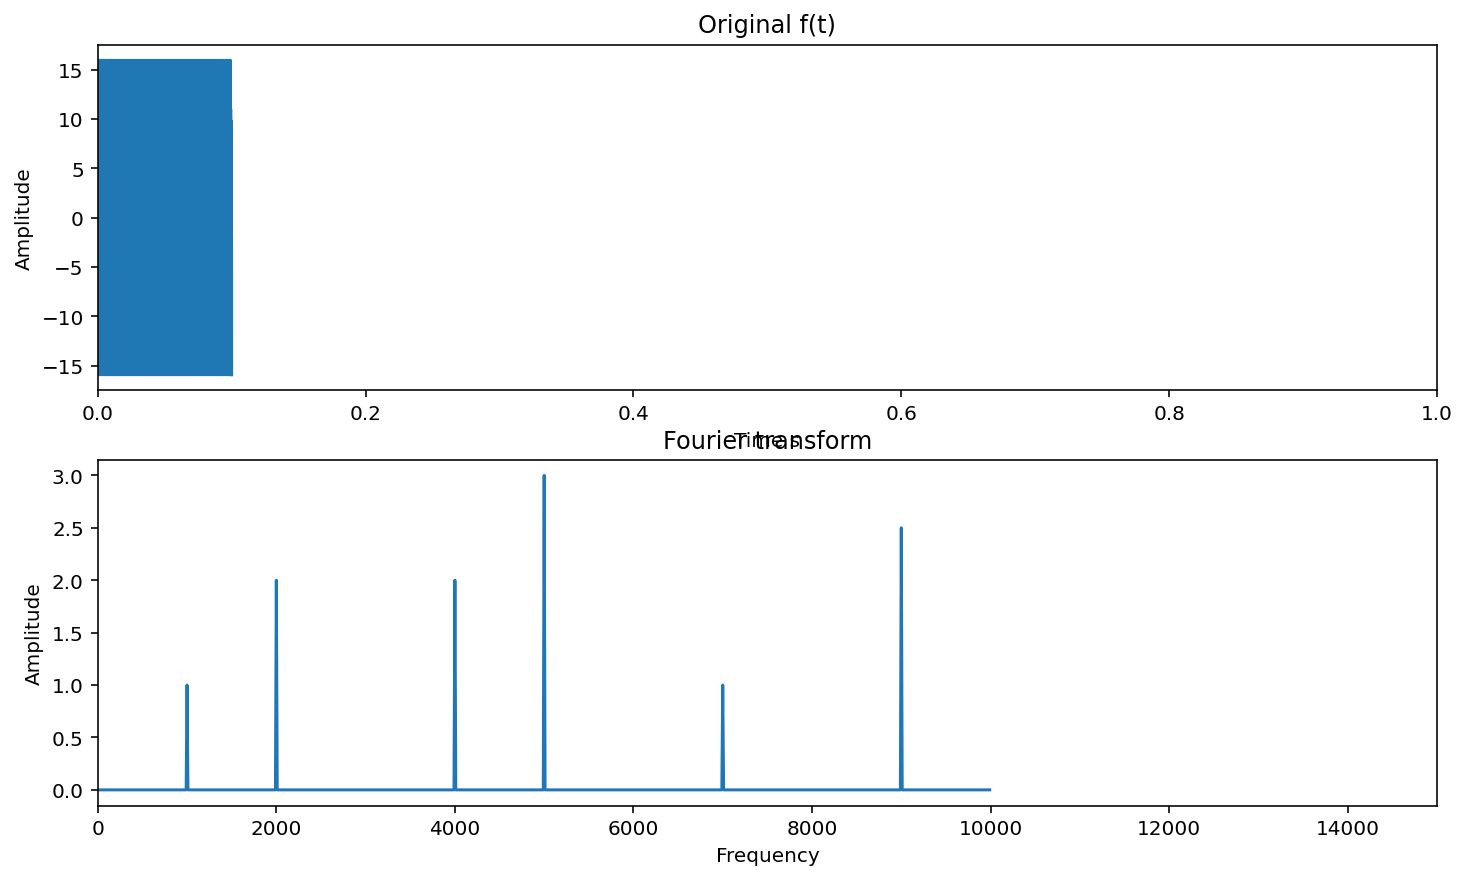

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.io import wavfile

file_name='test_data.csv' # name of file with extension containing data to be analysed

Upper_frequency = 15000 # set upper frequency for plot of Fourier transform, adjust to show Fourier components clearly
Start_time = 0
Time_duration = 1 # time duration for plotting f(t), adjust to get a clear plot

if file_name[-3:]=='csv': # file is csv type
    data=np.genfromtxt(file_name,delimiter=',') # Read in f(t) from file
    # separates data into two arrays, time and amplitudes
    time = data[:,0]
    amplitude = data[:,1]
    samplingFrequency = 1/(time[1]-time[0]) # sampling frequency found from time difference bewteen successive points

if file_name[-3:]=='wav': # file isa wav type
    rate, audio = wavfile.read(file_name) # read in audio file
    amplitude = audio 
    #amplitude = np.mean(audio, axis=1) # replace previous line with this one if data is stero
    time = np.arange(0, len(audio)/rate, 1/rate) # create time axis array for audio plot
    samplingFrequency=rate

# Plot a sample of the input data f(t)
plt.subplot(211)
plt.title('Original f(t)')
plt.xlim([Start_time,Start_time+Time_duration])
plt.plot(time, amplitude)
plt.xlabel('Time s')
plt.ylabel('Amplitude')

# Calculate the Fourier transform of f(t)
fourierTransform = np.fft.fft(amplitude)/len(amplitude) # Calculate and normalise the Forier transform
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Transform has both positive and negative frequencies, select the positive frequencies
tpCount     = len(amplitude) # At this point the frequency separation of the data in the Fourier transform is unknown, find the frequency values from length of original data and sampling frequency
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod # this array holds the frequency values

# Plot the Fourier transform
plt.subplot(212)
plt.title('Fourier transform')
plt.xlim([0,Upper_frequency])
#plt.ylim([0,0.01]) # may need to include to see Fourier compoents clearly
plt.plot(frequencies, abs(fourierTransform)) # data points are complex so take the absolute values
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.show()


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.io import wavfile

file_name='testing2.csv' # name of file with extension containing data to be analysed

Upper_frequency = 15000 # set upper frequency for plot of Fourier transform, adjust to show Fourier components clearly
Start_time = 0
Time_duration = 0.005 # time duration for plotting f(t), adjust to get a clear plot

if file_name[-3:]=='csv': # file is csv type
    data=np.genfromtxt(file_name,delimiter=',',skip_header=1) # Read in f(t) from file
    # separates data into two arrays, time and amplitudes
    time = data[:,0]
    amplitude = data[:,1]
    samplingFrequency = 1/(time[1]-time[0]) # sampling frequency found from time difference bewteen successive points

if file_name[-3:]=='wav': # file isa wav type
    rate, audio = wavfile.read(file_name) # read in audio file
    amplitude = audio 
    #amplitude = np.mean(audio, axis=1) # replace previous line with this one if data is stero
    time = np.arange(0, len(audio)/rate, 1/rate) # create time axis array for audio plot
    samplingFrequency=rate

# Plot a sample of the input data f(t)
plt.subplot(211)
plt.title('Original f(t)')
plt.xlim([Start_time,Start_time+Time_duration])
plt.plot(time, amplitude)
plt.xlabel('Time s')
plt.ylabel('Amplitude')

# Calculate the Fourier transform of f(t)
fourierTransform = np.fft.fft(amplitude)/len(amplitude) # Calculate and normalise the Forier transform
fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Transform has both positive and negative frequencies, select the positive frequencies
tpCount     = len(amplitude) # At this point the frequency separation of the data in the Fourier transform is unknown, find the frequency values from length of original data and sampling frequency
values      = np.arange(int(tpCount/2))
timePeriod  = tpCount/samplingFrequency
frequencies = values/timePeriod # this array holds the frequency values

# Plot the Fourier transform
plt.subplot(212)
plt.title('Fourier transform')
plt.xlim([0,Upper_frequency])
#plt.ylim([0,0.01]) # may need to include to see Fourier compoents clearly
plt.plot(frequencies, abs(fourierTransform)) # data points are complex so take the absolute values
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
print(samplingFrequency)
print(timePeriod)
plt.show()
#sample rate is how many sample you take during the time duration, if its not fast enough, miss out some frequencies
#if time duration increase, then the spikes gets narrower, likewise.
#what is sampling frequency?